In [1]:
import pandas as pd
from exploration import VuaExploration

# Load data (vua format)

In [2]:
dav = VuaExploration.load_vua('../data/vua/davidson/allData.csv')
gib = VuaExploration.load_vua('../data/vua/gibert/allData.csv')
q_gab = VuaExploration.load_vua('../data/vua/qian/allData_gab.csv')
q_red = VuaExploration.load_vua('../data/vua/qian/allData_red.csv')
wul = VuaExploration.load_vua('../data/vua/wulczyn/allData.csv')

In [3]:
datasets = {'dav': dav, 'gib': gib, 'q_gab': q_gab, 'q_red': q_red, 'wul': wul}

In [4]:
dav.data.head()

,Id,Text,Label,tokens,comment_length
0,0,!!! RT @mayasolovely: As a woman you shouldn't...,ok,"[!, !, !, rt, :, as, a, woman, you, shouldn't,...",29
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offens,"[!, !, !, rt, :, boy, dats, cold, ..., tyga, d...",22
2,2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offens,"[!, !, !, rt, dawg, !, !, !, rt, :, you, ever,...",26
3,3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offens,"[!, !, !, rt, :, she, look, like, a, tranny]",10
4,4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offens,"[!, !, !, rt, :, the, shit, you, hear, about, ...",28


# Length statistics

In [5]:
# stats for one dataset
dav.length_stats

count    24783.000000
mean        15.541420
std          7.954625
min          1.000000
25%          9.000000
50%         15.000000
75%         22.000000
max         51.000000
Name: comment_length, dtype: float64

In [6]:
# stats for all datasets
len_df = pd.DataFrame()
for key in datasets:
    s = datasets[key].length_stats
    s.name = key
    len_df = len_df.append(s)
len_df.T

,dav,gib,q_gab,q_red,wul
25%,9.000000,9.000000,11.000000,12.000000,19.000000
50%,15.000000,16.000000,21.000000,27.000000,41.000000
75%,22.000000,25.000000,41.000000,60.000000,87.000000
count,24783.000000,10703.000000,32770.000000,22298.000000,115849.000000
max,51.000000,374.000000,772.000000,1684.000000,4235.000000
mean,15.541420,18.637578,30.453494,52.670374,83.035969
min,1.000000,1.000000,1.000000,1.000000,1.000000
std,7.954625,14.584372,38.602870,85.599035,152.718648


# Most frequent words

In [7]:
# five most frequent words in the 'hate' class of the 'dav' dataset and their counts
dav.get_topwords('hate', n=5)

[('bitch', 209), ('faggot', 187), ('like', 169), ('nigga', 138), ('ass', 138)]

In [8]:
# 20 most frequent words for each class in all datasets
freq_df = pd.DataFrame()
for key in datasets:
    for label in datasets[key].labels:
        words = [item[0] for item in datasets[key].get_topwords(label)]
        freq_df_label = pd.DataFrame(words, columns=pd.MultiIndex.from_tuples([(key, label)]))
        if freq_df.empty:
            freq_df = freq_df_label
        else:
            freq_df = freq_df.join(freq_df_label)
freq_df

dav                        gib              q_gab             q_red  \
          ok   offens     hate       ok     hate      hate      ok      hate   
0      trash    bitch    bitch    white    white    nigger    like      like   
1       like  bitches   faggot     like    black    faggot  people      cunt   
2       bird        😂     like   people     like      cunt   white    people   
3    charlie     hoes    nigga      one   people      like     one  retarded   
4     yellow     like      ass  youtube   whites  retarded     get   fucking   
5      birds    pussy    white      get   blacks     white   trump       get   
6          😂      hoe     fuck     good      get   fucking    know     women   
7        lol      ass    trash      see     jews      fuck     gab       one   
8        get     fuck   nigger    black      one    people    want      even   
9          ★      get  fucking     know     race    retard   think      shit   
10       one     shit        😂       go      see      shit   right      fuck   
11   yankees      got      fag      new     back       get    even     think   
12    ghetto    nigga   niggas     time       go      jews     see       men   
13    monkey      lol      get   school    think       jew    time      know   
14   colored   niggas     shit    think    negro       one     lol    retard   
15       got     know   people     well     even        go   never     cunts   
16      good     love  bitches      say     want      even      go        go   
17  #yankees       yo     hate     back      jew      know    jews     right   
18      know      one  niggers     want  country   niggers    good      time   
19        go  fucking  faggots     many     good     think     say      want   

                  wul             
        ok         ok       hate  
0   people    article       fuck  
1     like       page     nigger  
2      one  wikipedia       shit  
3      get        one       suck  
4    think       like        ass  
5     even     please     faggot  
6    women       talk       like  
7     know        see       hate  
8     time      think         go  
9    right     people  wikipedia  
10     men       know        fat  
11    shit       edit    fucking  
12    want       time      penis  
13  really   articles        die  
14    make       even        gay  
15     say        use       cunt  
16     see        may       page  
17     way       make       know  
18    good       good        jew  
19    much        get        get

### Words that appear across classes

In [9]:
# words that appear overall (in all classes of all datasets)
set(freq_df[('dav', 'offens')]) & set(freq_df[('dav', 'hate')]) & set(freq_df[('gib', 'hate')]) & set(freq_df[('q_gab', 'hate')]) & set(freq_df[('q_red', 'hate')]) & set(freq_df[('wul', 'hate')]) & \
set(freq_df[('dav', 'ok')]) & set(freq_df[('gib', 'ok')]) & set(freq_df[('q_gab', 'ok')]) & set(freq_df[('q_red', 'ok')]) & set(freq_df[('wul', 'ok')])

{'get', 'like'}

In [10]:
# words shared by all classes of davidson
set(freq_df[('dav', 'hate')]) & set(freq_df[('dav', 'ok')]) & set(freq_df[('dav', 'offens')])

{'get', 'like', '😂'}

In [11]:
# words shared by both classes of gibert
set(freq_df[('gib', 'hate')]) & set(freq_df[('gib', 'ok')])

{'back',
 'black',
 'get',
 'go',
 'good',
 'like',
 'one',
 'people',
 'see',
 'think',
 'want',
 'white'}

In [12]:
# words shared by both classes of q_gab
set(freq_df[('q_gab', 'hate')]) & set(freq_df[('q_gab', 'ok')])

{'even',
 'get',
 'go',
 'jews',
 'know',
 'like',
 'one',
 'people',
 'think',
 'white'}

In [13]:
# words shared by both classes of q_red
set(freq_df[('q_red', 'hate')]) & set(freq_df[('q_red', 'ok')])

{'even',
 'get',
 'know',
 'like',
 'men',
 'one',
 'people',
 'right',
 'shit',
 'think',
 'time',
 'want',
 'women'}

In [14]:
# words shared by both classes of wulczyn
set(freq_df[('wul', 'hate')]) & set(freq_df[('wul', 'ok')])

{'get', 'know', 'like', 'page', 'wikipedia'}

### Hate words

In [15]:
# words in the hate class of all datasets
set(freq_df[('dav', 'hate')]) & set(freq_df[('gib', 'hate')]) & set(freq_df[('q_gab', 'hate')]) & set(freq_df[('q_red', 'hate')]) & set(freq_df[('wul', 'hate')])

{'get', 'like'}

In [16]:
n_words = ['nigga', 'niggas', 'nigger', 'niggers', 'negro', 'negros']
freq_df.isin(n_words).any()

dav    ok        False
       offens     True
       hate       True
gib    ok        False
       hate       True
q_gab  hate       True
       ok        False
q_red  hate      False
       ok        False
wul    ok        False
       hate       True
dtype: bool

In [17]:
f_words = ['faggot', 'faggots', 'fag', 'fags']
freq_df.isin(f_words).any()

dav    ok        False
       offens    False
       hate       True
gib    ok        False
       hate      False
q_gab  hate       True
       ok        False
q_red  hate      False
       ok        False
wul    ok        False
       hate       True
dtype: bool

In [18]:
j_words = ['jew', 'jews']
freq_df.isin(j_words).any()

dav    ok        False
       offens    False
       hate      False
gib    ok        False
       hate       True
q_gab  hate       True
       ok         True
q_red  hate      False
       ok        False
wul    ok        False
       hate       True
dtype: bool

In [19]:
w_words = ['white', 'whites']
freq_df.isin(w_words).any()

dav    ok        False
       offens    False
       hate       True
gib    ok         True
       hate       True
q_gab  hate       True
       ok         True
q_red  hate      False
       ok        False
wul    ok        False
       hate      False
dtype: bool

In [20]:
sexist_words = ['bitch', 'bitches', 'cunt', 'cunts', 'cunty']
freq_df.isin(sexist_words).any()

dav    ok        False
       offens     True
       hate       True
gib    ok        False
       hate      False
q_gab  hate       True
       ok        False
q_red  hate       True
       ok        False
wul    ok        False
       hate       True
dtype: bool

In [21]:
r_words = ['retarded', 'retard', 'retards']
freq_df.isin(r_words).any()

dav    ok        False
       offens    False
       hate      False
gib    ok        False
       hate      False
q_gab  hate       True
       ok        False
q_red  hate       True
       ok        False
wul    ok        False
       hate      False
dtype: bool

### Hate vs. Offens in the Davidson dataset

In [22]:
# words shared by hate and offens (but not ok)
set(freq_df[('dav', 'hate')]) & set(freq_df[('dav', 'offens')])

{'ass',
 'bitch',
 'bitches',
 'fuck',
 'fucking',
 'get',
 'like',
 'nigga',
 'niggas',
 'shit',
 '😂'}

In [23]:
# words unique to offens
set(freq_df[('dav', 'offens')]) - set(freq_df[('dav', 'hate')])

{'got', 'hoe', 'hoes', 'know', 'lol', 'love', 'one', 'pussy', 'yo'}

In [24]:
# words unique to hate
set(freq_df[('dav', 'hate')]) - set(freq_df[('dav', 'offens')])

{'fag',
 'faggot',
 'faggots',
 'hate',
 'nigger',
 'niggers',
 'people',
 'trash',
 'white'}

# Pointwise Mutual Information

In [25]:
# 10 words with the highest pmi score for the 'hate' class of the 'dav' dataset
dav.get_top_pmi('hate')

['niggers',
 'faggots',
 'fags',
 'nigger',
 'racist',
 'faggot',
 'coon',
 'dyke',
 'queer',
 'fag',
 'white']

In [26]:
# 10 words with the highest pmi score for each class in all datasets
pmi_df = pd.DataFrame(index=range(10))
for key in datasets:
    for label in datasets[key].labels:
        words = [item for item in datasets[key].get_top_pmi(label)]
        pmi_df_label = pd.DataFrame(words, columns=[(key, label)])
        pmi_df = pmi_df.join(pmi_df_label)
pmi_df

,"(dav, ok)","(dav, offens)","(dav, hate)","(gib, ok)","(gib, hate)","(q_gab, hate)","(q_gab, ok)","(q_red, hate)","(q_red, ok)","(wul, ok)","(wul, hate)"
0,#hoosiers,dats,niggers,14,scum,faggotry,prompts,faggotry,👏,implication,motherfucking
1,derek,faithful,faggots,active,negroes,memorize,laquan,faggot,hiv,assurance,spics
2,apes,foh,fags,sports,jews,bobby,post-everywhere,faggots,surrounding,cosmology,fuckhead
3,★,slap,nigger,12,jew,bombislam,✔,retards,mandrake,particles,gayfag
4,#yankees,gucci,racist,university,negro,1v1,improvements,cunty,pearce,sharon,lolooolbootstoots
5,massage,cum,faggot,football,africa,nigga,details,cunt,pedophilia,rabbis,chocobos
6,mocks,booty,coon,l,countries,fag,polygyny,cunts,intention,clergy,dickface
7,yankee,👐,dyke,john,blacks,niggers,∆,retard,de,orthodoxy,limped-dicked
8,jeter,argue,queer,early,non,nigger,#australia,niggers,milo,certification,fuckbags
9,sole,neva,fag,text,asians,faggot,https://TheGreatestStoryNeverTold.tv,retarded,odds,moshe,hellor


In [27]:
n_words = ['nigga', 'niggas', 'nigger', 'niggers', 'negro', 'negros']
pmi_df.isin(n_words).any()

(dav, ok)        False
(dav, offens)    False
(dav, hate)       True
(gib, ok)        False
(gib, hate)       True
(q_gab, hate)     True
(q_gab, ok)      False
(q_red, hate)     True
(q_red, ok)      False
(wul, ok)        False
(wul, hate)      False
dtype: bool

In [28]:
f_words = ['faggot', 'faggots', 'fag', 'fags', 'faggotry', 'gayfag']
pmi_df.isin(f_words).any()

(dav, ok)        False
(dav, offens)    False
(dav, hate)       True
(gib, ok)        False
(gib, hate)      False
(q_gab, hate)     True
(q_gab, ok)      False
(q_red, hate)     True
(q_red, ok)      False
(wul, ok)        False
(wul, hate)       True
dtype: bool

In [29]:
j_words = ['jew', 'jews']
pmi_df.isin(j_words).any()

(dav, ok)        False
(dav, offens)    False
(dav, hate)      False
(gib, ok)        False
(gib, hate)       True
(q_gab, hate)    False
(q_gab, ok)      False
(q_red, hate)    False
(q_red, ok)      False
(wul, ok)        False
(wul, hate)      False
dtype: bool

In [30]:
sexist_words = ['bitch', 'bitches', 'cunt', 'cunts', 'cunty']
pmi_df.isin(sexist_words).any()

(dav, ok)        False
(dav, offens)    False
(dav, hate)      False
(gib, ok)        False
(gib, hate)      False
(q_gab, hate)    False
(q_gab, ok)      False
(q_red, hate)     True
(q_red, ok)      False
(wul, ok)        False
(wul, hate)      False
dtype: bool

# Lexicons

In [31]:
# load lexicons in vua format
hatebase = pd.read_csv('../lexicons/hatebase_dict_vua_format.csv', sep=';', header=0)
w_base = pd.read_csv('../lexicons/wiegand_base_vua_format.csv', sep=';', header=0)
w_expand = pd.read_csv('../lexicons/wiegand_expanded_vua_format.csv', sep=';', header=0)

## All three lexicons combined

In [32]:
# combine lexicons into one set; duplicates and NaN's are removed
# only 'hate' words are included ('True' label in w_base, positive label in w_expand)
hateset = set(hatebase.loc[hatebase.Label == 'hate'].Entry.str.lower())
hateset |= set(w_base.loc[w_base.Label == True].Entry.str.lower())
hateset |= set(w_expand.loc[w_expand.Label > 0].Entry.str.lower())
hateset = set(item for item in hateset if item == item)
len(hateset)

3756

In [33]:
# add the lexicon as attribute to the datasets
for key in datasets:
    setattr(datasets[key], 'lexicon', hateset)

C:\Users\User\OneDrive\current_projects_jk\pynlp\exploration\exploration.py:156: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  case=case_sensitive,


In [34]:
# show the % of comments in each class that have at least one lexicon match
dav.lexicon_overlap

lex_match,False,True,Total,%True
Label,,,,
hate,NaN,1430.0,1430,100.0
offens,1.0,19189.0,19190,100.0
ok,1.0,4162.0,4163,100.0
Total,2.0,24781.0,24783,100.0


In [35]:
gib.lexicon_overlap

lex_match,False,True,Total,%True
Label,,,,
hate,640,556,1196,46.5
ok,8018,1489,9507,15.7
Total,8658,2045,10703,19.1


In [36]:
q_gab.lexicon_overlap

lex_match,False,True,Total,%True
Label,,,,
hate,641,13963,14604,95.6
ok,11178,6988,18166,38.5
Total,11819,20951,32770,63.9


In [37]:
q_red.lexicon_overlap

lex_match,False,True,Total,%True
Label,,,,
hate,289,4966,5255,94.5
ok,9007,8036,17043,47.2
Total,9296,13002,22298,58.3


In [38]:
wul.lexicon_overlap

lex_match,False,True,Total,%True
Label,,,,
hate,3182,12395,15577,79.6
ok,70798,29474,100272,29.4
Total,73980,41869,115849,36.1


## Only manually-labeled lexicons

In [39]:
# combine lexicons into one set; duplicates and NaN's are removed
# only 'hate' words are included ('True' label in w_base)
hateset = set(hatebase.loc[hatebase.Label == 'hate'].Entry.str.lower())
hateset |= set(w_base.loc[w_base.Label == True].Entry.str.lower())
hateset = set(item for item in hateset if item == item)
len(hateset)

1463

In [40]:
# add the lexicon as attribute to the datasets
for key in datasets:
    setattr(datasets[key], 'lexicon', hateset)

In [41]:
# show the % of comments in each class that have at least one lexicon match
dav.lexicon_overlap

lex_match,False,True,Total,%True
Label,,,,
hate,NaN,1430.0,1430,100.0
offens,1.0,19189.0,19190,100.0
ok,1.0,4162.0,4163,100.0
Total,2.0,24781.0,24783,100.0


In [42]:
gib.lexicon_overlap

lex_match,False,True,Total,%True
Label,,,,
hate,758,438,1196,36.6
ok,8680,827,9507,8.7
Total,9438,1265,10703,11.8


In [43]:
q_gab.lexicon_overlap

lex_match,False,True,Total,%True
Label,,,,
hate,897,13707,14604,93.9
ok,13216,4950,18166,27.2
Total,14113,18657,32770,56.9


In [44]:
q_red.lexicon_overlap

lex_match,False,True,Total,%True
Label,,,,
hate,440,4815,5255,91.6
ok,11317,5726,17043,33.6
Total,11757,10541,22298,47.3


In [45]:
wul.lexicon_overlap

lex_match,False,True,Total,%True
Label,,,,
hate,5507,10070,15577,64.6
ok,84931,15341,100272,15.3
Total,90438,25411,115849,21.9


# t-SNE

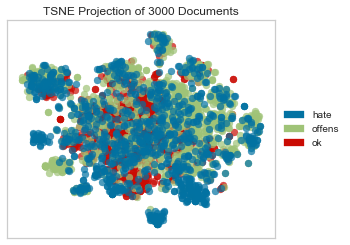

In [46]:
dav.tsne_plot('dav_tsne.png')

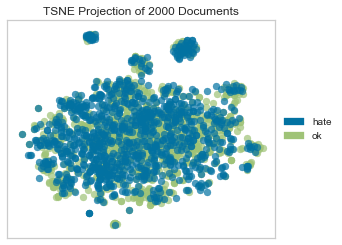

In [47]:
gib.tsne_plot('gib_tsne.png')

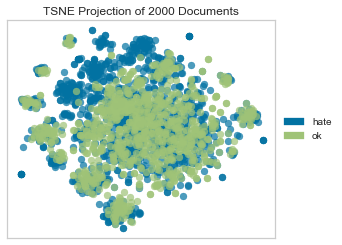

In [48]:
q_gab.tsne_plot('q_gab_tsne.png')

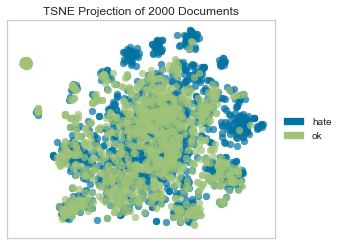

In [49]:
q_red.tsne_plot('q_red_tsne.png')

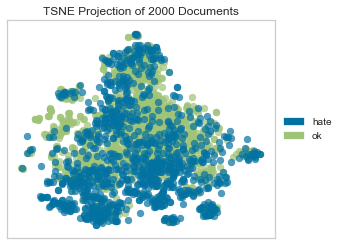

In [50]:
wul.tsne_plot('wul_tsne.png')